## 波動関数の保存及び読み込み

In [1]:
# ipython notebook を使用しない場合は下記コマンドは無視して下さい
%matplotlib inline

波動関数の保存は savetxtで行う事ができる．

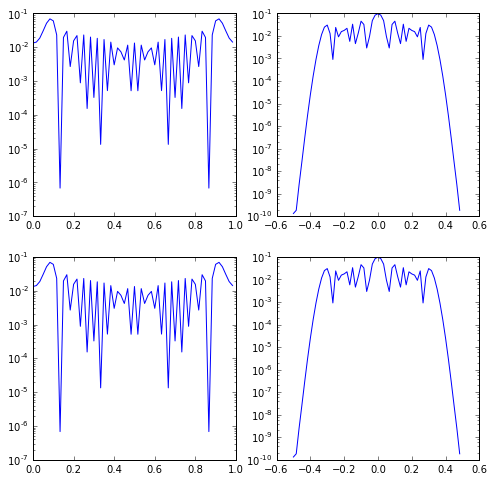

In [3]:
import SimpleQmap as sq
import numpy as np
import matplotlib.pyplot as plt

dim = 60
k = 1
qmin, qmax = 0, 1
pmin, pmax = -0.5,0.5

cmap = sq.StandardMap(k=k)

domain = [[qmin,qmax],[pmin,pmax]]
qmap = sq.Qmap(cmap, dim, domain) # defines the quantum system
evals, evecs = qmap.eigen() # return eigenvalues and list of eigenvector of the system. 

fig, axs = plt.subplots(2,2,figsize=(8,8))

vec = evecs[0] # 0-th eigen vector

q,p = vec.x[0],vec.x[1]
    
axs[0][0].plot(q,vec.qrep().abs2(), '-')
axs[0][1].plot(p,vec.prep().abs2(), '-')

for ax in axs[0]:
    ax.semilogy()


vec.savetxt("eigen_qrep_0.dat", rep="q")
vec.savetxt("eigen_prep_0.dat", rep="p")
#vec.savetxt("eigen_hsm_0.dat", rep="hsm")

data0 = np.loadtxt("eigen_qrep_0.dat").T
data1 = np.loadtxt("eigen_prep_0.dat").T

axs[1][0].plot(data0[0],data0[1], '-')
axs[1][1].plot(data1[0],data1[1], '-')

for ax in axs[1]:
    ax.semilogy()

plt.show()

rep = "q" もしくは rep = "p"を指定して，
savetxtを用いて波動関数 $\ket{\phi}$ を保存した場合，保存データは次のようになる．

$x$を指定した座標として

1列目 $x$ 座標の値
    
2列目 $x$ 表示での波動関数の絶対値二乗 $|\bracket{x}{\phi}|^2$

3列目 $\bracket{x}{\phi}$ の実部

4列目 $\bracket{x}{\phi}$ の虚部

である．

numpyのloadtxtを用いてこれらのデータを配列に格納することも可能であるが，表示の変換や伏見表示の計算をすぐに実行することができない為
SimpleQmap で定義されたloadtxtを使う事を勧める．
ただし，SimpleQmapは内部演算を行う際に表示を$q$で統一しているため
$p$ -表示波動関数をSimpleQmapのloadtxtで読み込んだ場合，自動的に$q$ -表示に変換されるので注意して欲しい．

なお，伏見表示に関するloadtxtは準備していません．

load:eigen_qrep_0.dat
dim:60
domain:[0.000000,1.000000]x[-0.500000,0.500000]
representation:q
load:eigen_prep_0.dat
dim:60
domain:[0.000000,1.000000]x[-0.500000,0.500000]
!!Warning!!
convert original data (p-rep.) to q-rep.



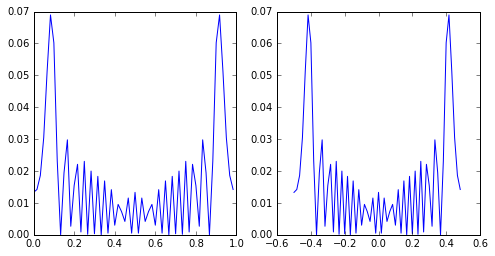

In [11]:
fig, axs = plt.subplots(1,2,figsize=(8,4))

vec1 = sq.loadtxt("eigen_qrep_0.dat").T
vec2 = sq.loadtxt("eigen_prep_0.dat").T

axs[0].plot(q,vec1.abs2(), '-') 
axs[1].plot(p,vec2.abs2(), '-') # wrong 
plt.show()

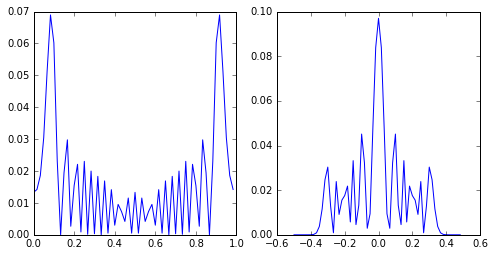

In [10]:
fig, axs = plt.subplots(1,2,figsize=(8,4))

vec1 = sq.loadtxt("eigen_qrep_0.dat",verbose=False).T
vec2 = sq.loadtxt("eigen_prep_0.dat",verbose=False).T

axs[0].plot(q,vec1.qrep().abs2(), '-') 
axs[1].plot(p,vec2.prep().abs2(), '-') # good
plt.show()

伏見表示は

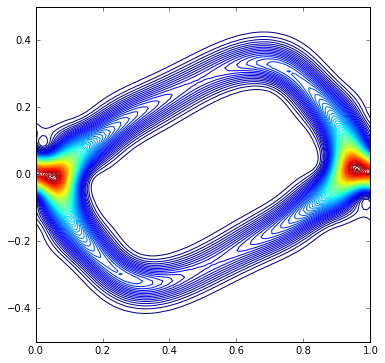

In [9]:
fig, axs = plt.subplots(1,1,figsize=(6,6))

x,y,z = vec1.hsmrep(col=100,row=100)
axs.contour(x,y,z,100) 
plt.show()